In [158]:
%config Completer.use_jedi = False

In [159]:
import pandas as pd
from datetime import datetime
from pykrige.ok import OrdinaryKriging
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geobr
from scipy.spatial import KDTree
from shapely.geometry import Point
from scipy.spatial import KDTree
from statistics import mean 

In [160]:
# Caminhos dos diretórios raiz
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'
general_path = 'C:/Users/linde/OneDrive/Hidroweb'

In [161]:
df_total_hdf = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_CLEANED_1961_2020.h5')
df_total_hdf = df_total_hdf.drop_duplicates(ignore_index = True).reset_index(drop = True)
df_total_hdf.tail(5)

,Date,Value,Code,Quality Index,Quality Label
103541896,1996-02-25,25.8,08560000,89.527684,Good Quality
103541897,1996-02-26,0.0,08560000,89.527684,Good Quality
103541898,1996-02-27,0.0,08560000,89.527684,Good Quality
103541899,1996-02-28,0.0,08560000,89.527684,Good Quality
103541900,1996-02-29,0.0,08560000,89.527684,Good Quality


In [162]:
df_info = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_CLEANED_1961_2020_GAUGES.h5')
df_info.tail(5)

,Name,Code,City,State,Responsible,Latitude,Longitude
11022,ÁGUA FRIA,08460003,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964
11023,UIRAMUTA,08460004,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664
11024,NOVA ESPERANÇA/MARCO BV-8,08461000,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297
11025,MISSÃO AUARIS - JUSANTE,08464001,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431
11026,FAZENDA BANDEIRA BRANCA,08560000,UIRAMUTA,RORAIMA,ANA,4.6306,-60.4706


In [163]:
df_total = pd.merge(df_total_hdf, df_info, on = ['Code'], how ='left')
df_total = df_total[[
    'Date',
    'Value',
    'Code',
    'Name',
    'City',
    'State',
    'Responsible',
    'Latitude',
    'Longitude'
]]
df_total.tail(5)

,Date,Value,Code,Name,City,State,Responsible,Latitude,Longitude
103541896,1996-02-25,25.8,08560000,FAZENDA BANDEIRA BRANCA,UIRAMUTA,RORAIMA,ANA,4.6306,-60.4706
103541897,1996-02-26,0.0,08560000,FAZENDA BANDEIRA BRANCA,UIRAMUTA,RORAIMA,ANA,4.6306,-60.4706
103541898,1996-02-27,0.0,08560000,FAZENDA BANDEIRA BRANCA,UIRAMUTA,RORAIMA,ANA,4.6306,-60.4706
103541899,1996-02-28,0.0,08560000,FAZENDA BANDEIRA BRANCA,UIRAMUTA,RORAIMA,ANA,4.6306,-60.4706
103541900,1996-02-29,0.0,08560000,FAZENDA BANDEIRA BRANCA,UIRAMUTA,RORAIMA,ANA,4.6306,-60.4706


### TESTING TOPIC

In [307]:
df_temp = df_total[(df_total['State'] == 'CEARÁ') & (df_total['Date'] == '2022-11-05')]
df_temp.tail(5)

,Date,Value,Code,Name,City,State,Responsible,Latitude,Longitude
22501148,2022-11-05,18.8,00740040,BREJINHO,ARARIPE,CEARÁ,FUNCEME-CE,-7.1833,-40.0167
22518578,2022-11-05,0.0,00740043,SALITRE,SALITRE,CEARÁ,FUNCEME-CE,-7.2828,-40.4669
22522597,2022-11-05,3.0,00740049,CHAPADA DO ALEGRE,SALITRE,CEARÁ,FUNCEME-CE,-7.1056,-40.2719
22523781,2022-11-05,0.0,00740050,SÍTIO MILHANS,SALITRE,CEARÁ,FUNCEME-CE,-7.1750,-40.3361
22526887,2022-11-05,0.0,00740052,SITIO QUENQUELERE,POTENGI,CEARÁ,FUNCEME-CE,-7.0339,-40.0492


In [308]:
sorted_df = df_temp.sort_values(by='Value', ascending=False)
sorted_df.head(5)

,Date,Value,Code,Name,City,State,Responsible,Latitude,Longitude
21515258,2022-11-05,108.0,00738063,SÍTIO SANTA CRUZ,AURORA,CEARÁ,ANA,-7.0142,-38.9581
8548815,2022-11-05,107.0,00440040,PARAÍSO,CATUNDA,CEARÁ,FUNCEME-CE,-4.5000,-40.1667
8663978,2022-11-05,92.0,00440057,MATRIZ,IPUEIRAS,CEARÁ,FUNCEME-CE,-4.5667,-40.8167
8978454,2022-11-05,86.7,00441014,SAUDOSO,PORANGA,CEARÁ,ANA,-4.6186,-41.1250
21706897,2022-11-05,82.0,00739004,INGAZEIRA,AURORA,CEARÁ,FUNCEME-CE,-7.1000,-39.0000


In [309]:
unique_dates = sorted_df['Date'].unique().tolist()
unique_dates

[Timestamp('2022-11-05 00:00:00')]

In [310]:
geometry = [Point(xy) for xy in zip(sorted_df['Longitude'], sorted_df['Latitude'])]

# Create a GeoDataFrame using the geometry column and other attributes
gdf_gauges = gpd.GeoDataFrame(sorted_df, geometry=geometry)
gdf_gauges

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


,Date,Value,Code,Name,City,State,Responsible,Latitude,Longitude,geometry
21515258,2022-11-05,108.0,00738063,SÍTIO SANTA CRUZ,AURORA,CEARÁ,ANA,-7.0142,-38.9581,POINT (-38.95810 -7.01420)
8548815,2022-11-05,107.0,00440040,PARAÍSO,CATUNDA,CEARÁ,FUNCEME-CE,-4.5000,-40.1667,POINT (-40.16670 -4.50000)
8663978,2022-11-05,92.0,00440057,MATRIZ,IPUEIRAS,CEARÁ,FUNCEME-CE,-4.5667,-40.8167,POINT (-40.81670 -4.56670)
8978454,2022-11-05,86.7,00441014,SAUDOSO,PORANGA,CEARÁ,ANA,-4.6186,-41.1250,POINT (-41.12500 -4.61860)
21706897,2022-11-05,82.0,00739004,INGAZEIRA,AURORA,CEARÁ,FUNCEME-CE,-7.1000,-39.0000,POINT (-39.00000 -7.10000)
...,...,...,...,...,...,...,...,...,...,...
7176283,2022-11-05,0.0,00438081,BOA ÁGUA,MORADA NOVA,CEARÁ,FUNCEME-CE,-4.7667,-38.5000,POINT (-38.50000 -4.76670)
7150663,2022-11-05,0.0,00438077,TANQUES,MARANGUAPE,CEARÁ,FUNCEME-CE,-4.0833,-38.7833,POINT (-38.78330 -4.08330)
7138981,2022-11-05,0.0,00438074,BIXOPA,LIMOEIRO DO NORTE,CEARÁ,FUNCEME-CE,-4.9833,-38.2167,POINT (-38.21670 -4.98330)
7116222,2022-11-05,0.0,00438072,IBICUITINGA,IBICUITINGA,CEARÁ,FUNCEME-CE,-4.9667,-38.6333,POINT (-38.63330 -4.96670)


In [311]:
plt.style.use("ggplot")
SHP = gpd.read_file(general_path + '/SHP/Brazilian_Border.shp')
state_data = geobr.read_state(year=2019)  # Adjust the year if needed
state_data.crs = "EPSG:4326"
state_data["name_state"] = state_data["name_state"].str.upper()
state_data = state_data[state_data['name_state'] == 'CEARÁ']
state_data["name_state"] = state_data["name_state"].str.upper()
state_data.head(3)

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_state,abbrev_state,name_state,code_region,name_region,geometry
9,23.0,CE,CEARÁ,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18862 ..."


C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


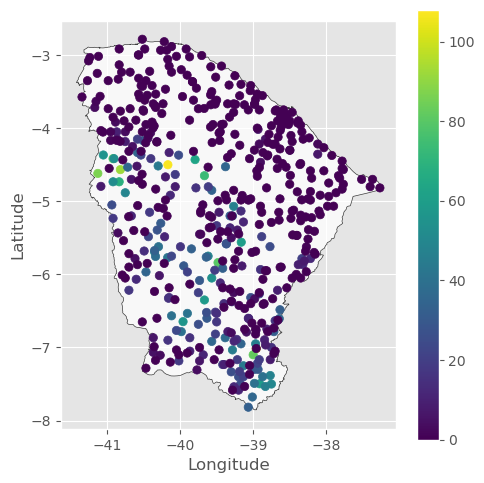

In [312]:
fig, ax = plt.subplots(figsize = (5, 5))
# SHP.plot(ax = ax, color = 'w')
state_data.plot(ax = ax, alpha=0.75, edgecolor = 'black', color = 'white')
gdf_gauges.plot(ax=ax, column='Value', legend=True, cmap='viridis')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.set_title('IDW Interpolation')

# Show the plot
plt.tight_layout()
plt.show()

In [313]:
df_coords = pd.read_hdf(general_path + "./Coords/BRASIL_GRID_0_DOT_25_DEGREE.h5")
df_coords

,Latitude,Longitude,Inside_Boundary
0,-33.625,-53.375,True
1,-33.375,-53.375,True
2,-33.375,-53.125,True
3,-33.125,-53.125,True
4,-33.125,-52.875,True
...,...,...,...
11345,4.875,-60.375,True
11346,4.875,-60.125,True
11347,5.125,-60.625,True
11348,5.125,-60.375,True


In [314]:
df_coords_temp = df_coords[['Latitude', 'Longitude']]
df_coords_temp

,Latitude,Longitude
0,-33.625,-53.375
1,-33.375,-53.375
2,-33.375,-53.125
3,-33.125,-53.125
4,-33.125,-52.875
...,...,...
11345,4.875,-60.375
11346,4.875,-60.125
11347,5.125,-60.625
11348,5.125,-60.375


In [315]:
def check_containment(row):
    point = Point(row['Longitude'], row['Latitude'])  # Create Point object
    for idx, geometry in state_data['geometry'].items():
        if geometry.contains(point):
            return True  # If any geometry contains the point, return True
    return False  # If no geometry contains the point, return False

# Apply the function to each row and create a new column 'Inside_Boundary'
df_coords_temp['Inside_Boundary'] = df_coords_temp.apply(check_containment, axis=1)
df_coords_temp = df_coords_temp[df_coords_temp['Inside_Boundary'] == True]
df_coords_temp = df_coords_temp.reset_index(drop = True)
df_coords_temp

,Latitude,Longitude,Inside_Boundary
0,-7.625,-39.125,True
1,-7.625,-38.875,True
2,-7.375,-40.125,True
3,-7.375,-39.625,True
4,-7.375,-39.375,True
...,...,...,...
192,-3.125,-39.625,True
193,-2.875,-40.875,True
194,-2.875,-40.625,True
195,-2.875,-40.375,True


In [316]:
# Create a KDTree from latitudes and longitudes
locations = df_temp[['Latitude', 'Longitude']].values
kdtree = KDTree(locations)

In [317]:
# Function for IDW interpolation

# In the IDW methodology, each of the nearest stations
# selected for the interpolation at a query point is weighted
# (Wk) by Wk=d(k)−p, where d is the distance of station k and
# the specified query point. The p values is the power
# parameter that we use p = 2, as suggested by Ly et al.
# (2011) and Xavier et al. (2016).

def idw_interpolation(row, p=2):
    # Find the indices and distances of the 5 nearest stations 
    step_size = 0.25 / 4

    start_lat = row['Latitude'] - 0.125
    end_lat = row['Latitude'] + 0.125 + step_size  # Add step_size to include the endpoint
    generated_latitudes = [round(start_lat + i * step_size, 6) for i in range(int((end_lat - start_lat) / step_size))]

    start_lon = row['Longitude'] - (0.25 / 2)
    end_lon = row['Longitude'] + (0.25 / 2) + step_size  # Add step_size to include the endpoint
    generated_longitudes = [round(start_lon + i * step_size, 6) for i in range(int((end_lon - start_lon) / step_size))]

    interpolated_value_avg = []

    for lat in generated_latitudes:
        for lon in generated_longitudes:
            distances, indices = kdtree.query([lat, lon], k=5)
            if max(distances) >= 10.0:
                print("distances", distances)
            # Compute the inverse distance weights
            weights = 1 / (distances + 1e-6) ** p  # Adding a small value to prevent division by zero
    
            # Get the values at the nearest stations
            values = df_temp.iloc[indices]['Value'].values
    
            # Calculate the weighted average
            interpolated_value = np.sum(weights * values) / np.sum(weights)
            interpolated_value_avg.append(interpolated_value)
            
    interpolated_value_final = mean(interpolated_value_avg)
    if interpolated_value_final > 5:
        # print('interpolated_value_avg', interpolated_value_avg)
        print('interpolated_value_final', interpolated_value_final)
        print(row['Latitude'], row['Longitude'])
        # print("generated_latitudes", generated_latitudes)
        # print("generated_longitudes", generated_longitudes)
    return interpolated_value_final


df_coords_temp['Interpolated_Value'] = df_coords_temp.apply(idw_interpolation, axis=1)
# # Example interpolation at a specific point
# interpolated_value = idw_interpolation(-3.9031, -38.6826)
# # -38.6826 -3.9031
# print(f"Interpolated Value: {interpolated_value}")
df_coords_temp

interpolated_value_final 20.121668955291973
-7.625 -39.125
interpolated_value_final 44.192300328656486
-7.625 -38.875
interpolated_value_final 7.913017673520706
-7.375 -39.625
interpolated_value_final 15.967621174914614
-7.375 -39.375
interpolated_value_final 20.653364743906618
-7.375 -39.125
interpolated_value_final 36.453218210422186
-7.375 -38.875
interpolated_value_final 36.537715057193736
-7.375 -38.625
interpolated_value_final 6.058203273573919
-7.125 -39.875
interpolated_value_final 6.550284673777902
-7.125 -39.625
interpolated_value_final 15.40008720080677
-7.125 -39.375
interpolated_value_final 35.87606650529647
-7.125 -39.125
interpolated_value_final 27.848785851422136
-7.125 -38.875
interpolated_value_final 16.432787614193856
-6.875 -40.125
interpolated_value_final 18.237774957137017
-6.875 -39.875
interpolated_value_final 19.85157268688083
-6.875 -39.625
interpolated_value_final 18.91036689584675
-6.875 -39.375
interpolated_value_final 19.24987007101892
-6.875 -39.125
inter

,Latitude,Longitude,Inside_Boundary,Interpolated_Value
0,-7.625,-39.125,True,20.121669
1,-7.625,-38.875,True,44.192300
2,-7.375,-40.125,True,4.836677
3,-7.375,-39.625,True,7.913018
4,-7.375,-39.375,True,15.967621
...,...,...,...,...
192,-3.125,-39.625,True,0.000000
193,-2.875,-40.875,True,0.000000
194,-2.875,-40.625,True,0.000000
195,-2.875,-40.375,True,0.000000


In [318]:
# Create a geometry column by combining Latitude and Longitude into a Point object
geometry = [Point(xy) for xy in zip(df_coords_temp['Longitude'], df_coords_temp['Latitude'])]

# Create a GeoDataFrame using the geometry column and other attributes
gdf_rainfall = gpd.GeoDataFrame(df_coords_temp, geometry=geometry)
gdf_rainfall

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


,Latitude,Longitude,Inside_Boundary,Interpolated_Value,geometry
0,-7.625,-39.125,True,20.121669,POINT (-39.12500 -7.62500)
1,-7.625,-38.875,True,44.192300,POINT (-38.87500 -7.62500)
2,-7.375,-40.125,True,4.836677,POINT (-40.12500 -7.37500)
3,-7.375,-39.625,True,7.913018,POINT (-39.62500 -7.37500)
4,-7.375,-39.375,True,15.967621,POINT (-39.37500 -7.37500)
...,...,...,...,...,...
192,-3.125,-39.625,True,0.000000,POINT (-39.62500 -3.12500)
193,-2.875,-40.875,True,0.000000,POINT (-40.87500 -2.87500)
194,-2.875,-40.625,True,0.000000,POINT (-40.62500 -2.87500)
195,-2.875,-40.375,True,0.000000,POINT (-40.37500 -2.87500)


C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


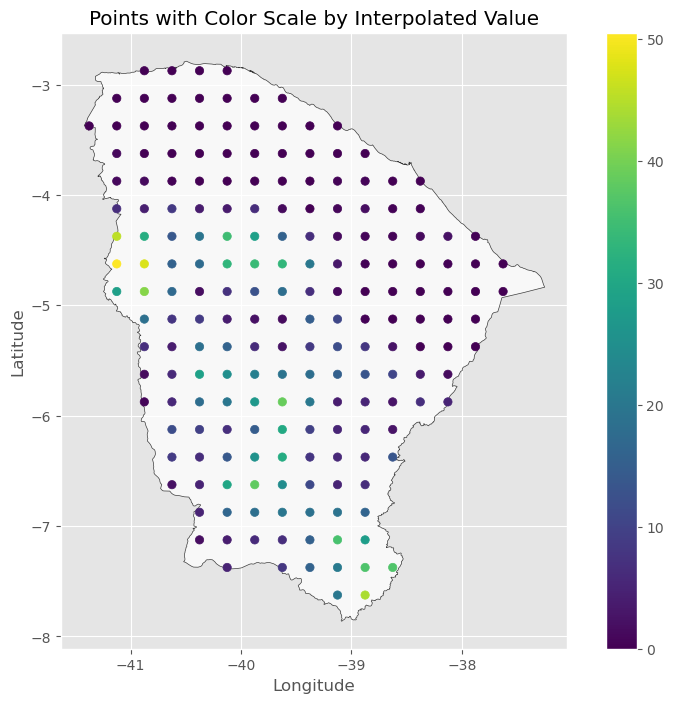

In [319]:
# Plotting the GeoPandas GeoDataFrame with a color scale based on 'Interpolated_Value'
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size if needed

# Plotting the points with a color scale based on the 'Interpolated_Value' column
state_data.plot(ax = ax, alpha=0.75, edgecolor = 'black', color = 'white')
gdf_rainfall.plot(ax=ax, column='Interpolated_Value', legend=True, cmap='viridis')

# Adding title and labels
plt.title('Points with Color Scale by Interpolated Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
